# Kacper Rzymkiewicz
# ASI 4
# ZADANIE NR.4

In [54]:
from skimage import io, color, img_as_ubyte, util, data
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings('ignore')

url = 'pattern2.png'
p = io.imread(url)
p = color.rgb2gray(p)
p = img_as_ubyte(p) 
p = util.invert(p)

th = 150
th, image = cv2.threshold(p, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)

In [55]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(20,20)):
    
    _, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

In [56]:
def Spr(i,j,obraz):
    
    return i >= 0 and i < obraz.shape[0] and j >=0 and j < obraz.shape[1]

def Wyszukiwanie(i,j,obraz,c):
    cc = [(i,j)]
    while cc:
        ii,jj = cc.pop(0)
        for xx in range(-1,2):
            for yy in range(-1,2):
                if xx == 0 and yy == 0:
                    continue
                a=ii+xx
                b=jj+yy
                if Spr(a,b,obraz) and obraz[a][b] == 0:
                    obraz[a][b] = c
                    cc.append((a,b))

In [57]:
def Znajdz(obraz):
    licznik = 20
    for i in range(obraz.shape[0]):
        for j in range(obraz.shape[1]):
            x = obraz[i][j]
            if x == 0:
                obraz[i][j] = licznik
                Wyszukiwanie(i,j,obraz,licznik)
                licznik += 65
    return obraz

In [58]:
def LiczbaObiektow(im):
    zb = set()
    left, right = im.shape[0] , im.shape[1]
    for i in range(1,left - 1):
        for j in range(1,right - 1):
            if im[i][j] != 255:
                zb.add(im[i][j])
                
    return len(zb)

In [59]:
image2 = Znajdz(image)
print(LiczbaObiektow(image2))

3


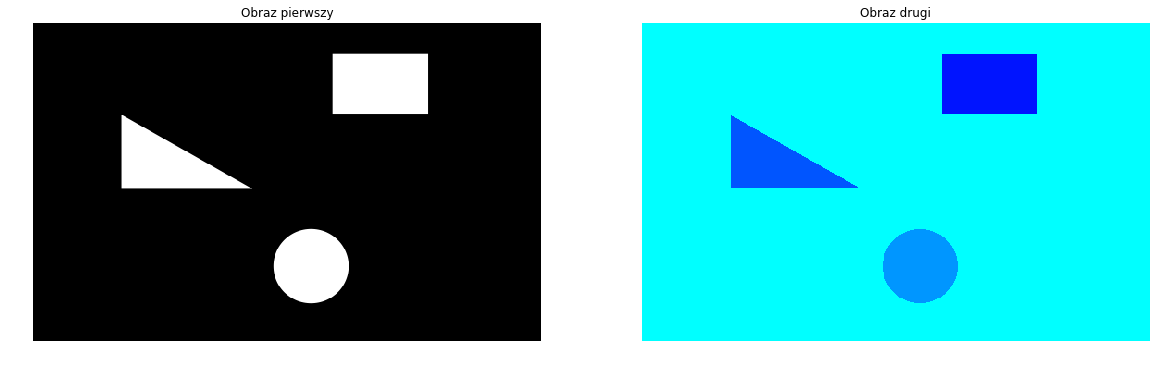

In [60]:
image3 = cv2.applyColorMap(image2, cv2.COLORMAP_AUTUMN)
show2imgs(p, image3)